# Telco Churn Analysis

# <ins>Imports</ins>

In [24]:
import acquire as a
import prepare as p
import explore as e
import model as m

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# <ins>Acquire</ins>

* Data acquired from the Codeup MySQL database `telco_churn`
* It contained 7043 rows and 22 columns before cleaning
* Each row represents an individual customer at Telco
* Each column represents a feature of the customers

In [32]:
# running the acquire_data() function from my acquire.py file 
# saving this dataframe as the variable 'df'

df = a.acquire_data()

# <ins>Prepare</ins>

* Drop duplicate columns
    * `payment_type_id` *- data exists in the `payment_type` column*
    * `internet_service_type_id` *- data exists in the `internet_service_type` column*
    * `contract_type_id` *- data exists in the `contract_type` column*
* Create `internet_service` column to indicate whether a customer subscribes to internet service & move after `multiple_lines` column
* Correct values & datatypes
    * changed values in the `senior_citizen` column from '1 or 0' to 'Yes or No'
    * filled null values in the `internet_service_type` with 'No internet service' based off of comparison to the `online_security` column
    * changed values in the `total_charges` from an object to a float
* Split data into 3 new dataframes, stratifying on `churn`:
    * Train - 60% of the original dataframe
    * Validate - 20% of the original dataframe
    * Test - 20% of the original dataframe
* No outliers have been removed

In [33]:
# running the prepare_data() function from my prepare.py file 
# saving dataframe as the variable 'df'

df = p.prepare_data(df)

In [34]:
# running the split_data() function from my prepare.py file
# saving the split dataframes in the following variables: train, validate, test

train, validate, test = p.split_data(df,'churn')

## Overview:

In [31]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
customer_id,,,,,,,,,,,,,,,,,,,,,
7169-YWAMK,Male,No,Yes,Yes,72,Yes,No,Yes,Yes,Yes,...,Yes,Yes,No,No,68.4,4855.35,0,Two year,DSL,Bank transfer (automatic)
6288-LBEAR,Female,No,No,No,23,Yes,No,Yes,No,Yes,...,Yes,No,No,Yes,79.1,1783.75,0,Month-to-month,Fiber optic,Mailed check
2808-CHTDM,Female,No,Yes,Yes,23,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,No,25.1,611.45,0,Two year,No internet service,Mailed check
4567-AKPIA,Female,No,Yes,Yes,41,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,Yes,109.1,4454.25,0,One year,Fiber optic,Bank transfer (automatic)
2885-HIJDH,Male,No,Yes,Yes,69,Yes,Yes,Yes,Yes,No,...,Yes,Yes,Yes,No,86.9,6194.10,0,Two year,DSL,Bank transfer (automatic)


### Summary:

In [32]:
train.describe()

,tenure,monthly_charges,total_charges,churn
count,4225.000000,4225.000000,4225.000000,4225.000000
mean,32.195266,64.537136,2266.771929,0.265325
std,24.632613,30.274294,2277.238910,0.441559
min,0.000000,18.250000,0.000000,0.000000
25%,8.000000,35.000000,374.800000,0.000000
50%,29.000000,70.250000,1379.800000,0.000000
75%,55.000000,89.800000,3767.400000,1.000000
max,72.000000,118.750000,8672.450000,1.000000


# <ins>Data Dictionary</ins>

| Feature | Definition |
|:--------|:-----------|
|customer_id|Unique identifier for each customer|
|gender|The gender of the customer (male,female)|
|senior_citizen|Indicates whether the customer is a senior citizen|
|partner|Indicates whether the customer has a partner|
|dependents|Indicates whether the customer has dependents|
|tenure|The duration in months that a customer has been with the service provider|
|phone_service|Indicates whether the customer subscribes to phone service|
|multiple_lines|Indicates whether the customer has multiple phone lines|
|internet_service|Indicates whether the customer subscribes to internet service|
|online_security|Indicates whether the customer has online security features|
|online_backup|Indicates whether the customer has online backup features|
|device_protection|Indicates whether the customer has device protection features|
|tech_support|Indicates whether the customer has technical support services|
|streaming_tv|Indicates whether the customer subscribes to streaming TV services|
|streaming_movies|Indicates whether the customer subscribes to streaming movie services|
|paperless_billing|Indicates whether the customer has opted for paperless billing|
|monthly_charges|The amount charged to the customer on a monthly basis|
|total_charges|The total charges incurred by the customer|
|churn|Indicates whether the customer has churned|
|contract_type|Type of contract subscribed by the customer (month-to-month, one-year, two-year)|
|internet_service_type|Type of internet service subscribed by the customer (DSL, fiber optic)|
|payment_type|The method of payment chosen by the customer (bank transfer, credit card, electronic check, mailed check)|

# Explore

## How often are customers churning?

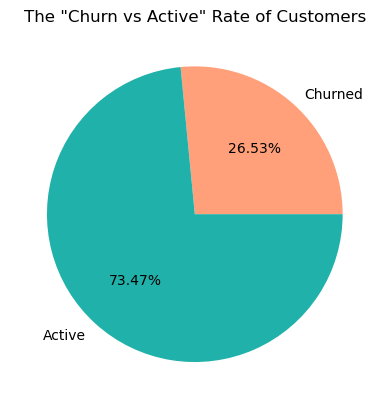

In [33]:
e.pie_churn(train,'churn')

> Customers are churning at 26.53% rate (using the training data)

## Does `tenure` affect the churn rate? 

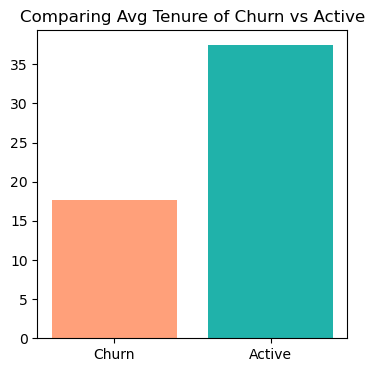

In [34]:
e.bar_tenure(train)

> The difference in the average tenure between churned & active customers is 19.85 months.

### Hypothesis Testing

**Formulate a null and alternative hypothesis**

> $H_0$: There is NO relationship between tenure & churn rate

> $H_a$: There IS a relationship between tenure & churn rate

**confidence interval: 95%**

**alpha: .05** 

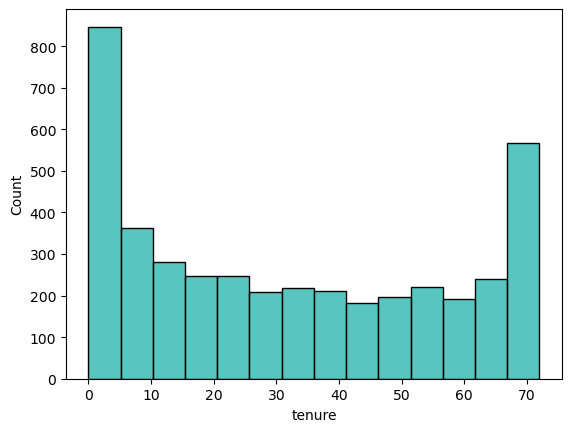

In [35]:
# checking the distribution of our continuous variable
sns.histplot(train.tenure,color='lightseagreen');

**Since we are comparing a continuous variable to a categorical variable & the continuous variable is NOT normally distributed, we will use the Mann-Whitney test.**

In [36]:
e.mann_whitney_tenure(train)

There IS a relationship between tenure & churn rate!


### Does `monthly_charges` affect the churn rate?

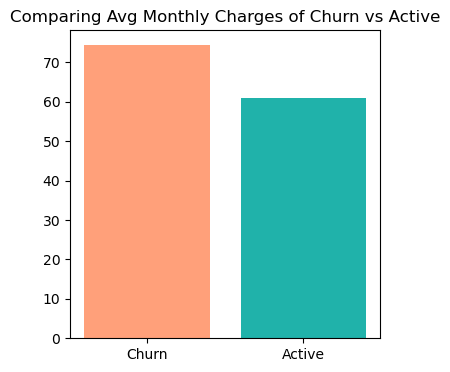

In [37]:
e.bar_monthly_charges(train)

> The difference in the average monthly charges between churned & active customers is $13.38.

### Hypothesis Testing

**Formulate a null and alternative hypothesis**

> $H_0$: There is NO relationship between monthly_charges & churn rate

> $H_a$: There IS a relationship between monthly_charges & churn rate

**confidence interval: 95%**

**alpha: .05** 

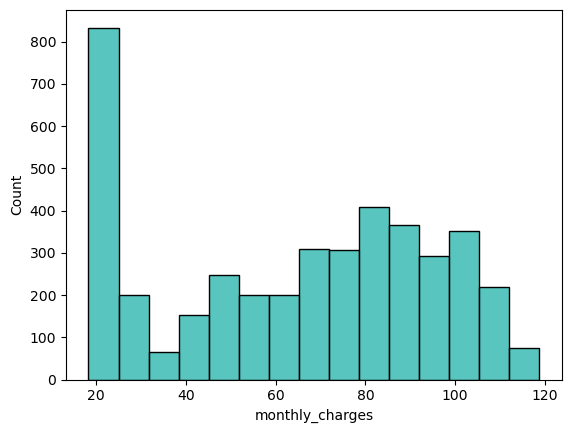

In [38]:
# checking the distribution of our continuous variable
sns.histplot(train.monthly_charges,color='lightseagreen');

**Since we are comparing a continuous variable to a categorical variable & the continuous variable is NOT normally distributed, we will use the Mann-Whitney test.**

In [13]:
e.mann_whitney_monthly_charges(train)

There IS a relationship between monthly_charges & churn rate!


### Does `contract_type` affect the churn rate?

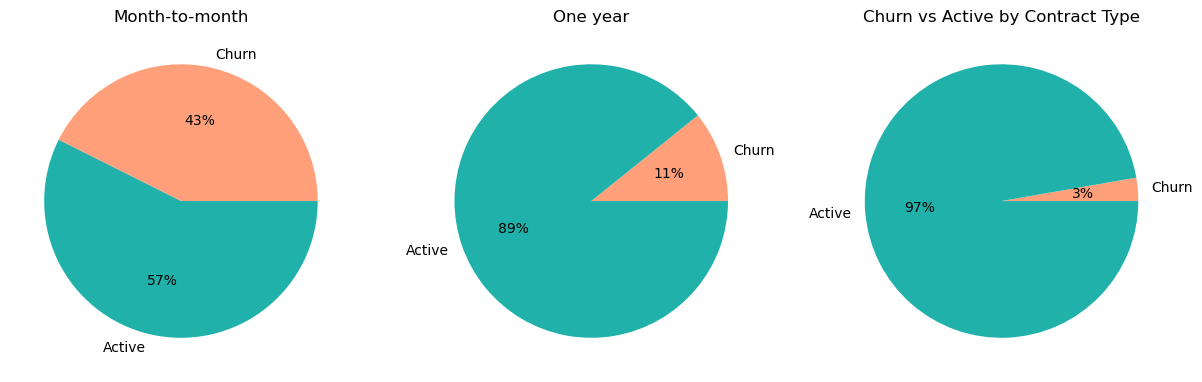

In [14]:
e.pie_churn_by_contract_type(train)

> There is a 32% difference in churn rate between the month-by-month contracts & one-year contracts

> There is an 8% difference in churn rate between the one-year contracts & two-year contracts

### Hypothesis Testing

**Since we are comparing two categorical variables, we will use the $χ^2$ test.**

**Formulate a null and alternative hypothesis**

> $H_0$: There is NO relationship between contract_type & churn rate

> $H_a$: There IS a relationship between contract_type & churn rate

**confidence interval: 95%**

**alpha: .05**

In [15]:
e.chi_squared_contract_type(train)

There IS a relationship between contract_type & churn rate!


# Model

In [5]:
train

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
customer_id,,,,,,,,,,,,,,,,,,,,,
7169-YWAMK,Male,No,Yes,Yes,72,Yes,No,Yes,Yes,Yes,...,Yes,Yes,No,No,68.40,4855.35,0,Two year,DSL,Bank transfer (automatic)
6288-LBEAR,Female,No,No,No,23,Yes,No,Yes,No,Yes,...,Yes,No,No,Yes,79.10,1783.75,0,Month-to-month,Fiber optic,Mailed check
2808-CHTDM,Female,No,Yes,Yes,23,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,No,25.10,611.45,0,Two year,No internet service,Mailed check
4567-AKPIA,Female,No,Yes,Yes,41,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,Yes,109.10,4454.25,0,One year,Fiber optic,Bank transfer (automatic)
2885-HIJDH,Male,No,Yes,Yes,69,Yes,Yes,Yes,Yes,No,...,Yes,Yes,Yes,No,86.90,6194.10,0,Two year,DSL,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2262-SLNVK,Female,No,No,No,1,Yes,No,Yes,No,No,...,No,No,No,No,70.10,70.10,0,Month-to-month,Fiber optic,Electronic check
0404-AHASP,Male,No,Yes,No,72,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,No,19.70,1421.90,0,Two year,No internet service,Credit card (automatic)
7767-UXAGJ,Male,No,No,No,1,Yes,Yes,Yes,No,No,...,No,No,No,Yes,50.45,50.45,1,Month-to-month,DSL,Electronic check


In [17]:
def preprocess_telco(train, validate, test):
    encoded_df = []
    for df in [train,validate,test]:
        yes_no_columns = ['multiple_lines','online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies']

        for col in df[yes_no_columns]:
            df.loc[:,col] = np.where(df[col] == 'Yes', 'Yes', 'No')
            
        encoded_columns = train.columns[train.nunique() < 10].tolist()
        
        df_encoded_columns = pd.get_dummies(train[encoded_columns],drop_first=True).astype(int)
        df = pd.concat([df, df_encoded_columns],
                                           axis=1)
        df = df.drop(columns=encoded_columns)
         
    return encoded_df

In [35]:
for df in [train,validate,test]:
    yes_no_columns = ['multiple_lines','online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies']

    for col in df[yes_no_columns]:
        df.loc[:,col] = np.where(df[col] == 'Yes', 'Yes', 'No')

In [40]:
encoded_columns = train.columns[train.nunique() < 10].tolist()

In [44]:
df_encoded_columns = pd.get_dummies(train[encoded_columns],drop_first=True).astype(int)

In [ ]:
pd.concat(

In [45]:
pd.concat([df,df_encoded_columns])

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,...,streaming_tv_Yes,streaming_movies_Yes,paperless_billing_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_No internet service,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
customer_id,,,,,,,,,,,,,,,,,,,,,
4706-AXVKM,Female,Yes,No,No,11.0,Yes,Yes,Yes,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9693-XMUOB,Male,Yes,Yes,No,59.0,No,No,Yes,No,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8946-BFWSG,Male,No,Yes,Yes,63.0,Yes,Yes,No,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9402-CXWPL,Female,No,No,No,70.0,Yes,Yes,Yes,No,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6646-JPPHA,Female,Yes,No,No,14.0,Yes,No,Yes,Yes,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2262-SLNVK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
0404-AHASP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
7767-UXAGJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
encoded_df = []
encoded_columns = train.columns[train.nunique() < 10].tolist()
df_encoded_columns = pd.get_dummies(train[encoded_columns],drop_first=True).astype(int)
encoded_df.append(pd.concat([train, df_encoded_columns],
                                           axis=1))

In [24]:
encoded_df

[             gender senior_citizen partner dependents  tenure phone_service  \
 customer_id                                                                   
 7169-YWAMK     Male             No     Yes        Yes      72           Yes   
 6288-LBEAR   Female             No      No         No      23           Yes   
 2808-CHTDM   Female             No     Yes        Yes      23           Yes   
 4567-AKPIA   Female             No     Yes        Yes      41           Yes   
 2885-HIJDH     Male             No     Yes        Yes      69           Yes   
 ...             ...            ...     ...        ...     ...           ...   
 2262-SLNVK   Female             No      No         No       1           Yes   
 0404-AHASP     Male             No     Yes         No      72           Yes   
 7767-UXAGJ     Male             No      No         No       1           Yes   
 0603-OLQDC     Male             No      No        Yes      12           Yes   
 5480-HPRRX   Female            Yes     